In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
df = pd.read_excel('Reduced_Student_Depression_Dataset.xlsx')

In [4]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5.0,0,8.97,2.0,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1,No,1
1,8,Female,24,Bangalore,Student,2.0,0,5.90,5.0,0,5-6 hours,Moderate,BSc,No,3.0,2,Yes,0
2,26,Male,31,Srinagar,Student,3.0,0,7.03,5.0,0,Less than 5 hours,Healthy,BA,No,9.0,1,Yes,0
3,30,Female,28,Varanasi,Student,3.0,0,5.59,2.0,0,7-8 hours,Moderate,BCA,Yes,4.0,5,Yes,1
4,32,Female,25,Jaipur,Student,4.0,0,8.13,3.0,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     100 non-null    int64  
 1   Gender                                 100 non-null    object 
 2   Age                                    100 non-null    int64  
 3   City                                   100 non-null    object 
 4   Profession                             100 non-null    object 
 5   Academic Pressure                      94 non-null     float64
 6   Work Pressure                          100 non-null    int64  
 7   CGPA                                   100 non-null    float64
 8   Study Satisfaction                     94 non-null     float64
 9   Job Satisfaction                       100 non-null    int64  
 10  Sleep Duration                         100 non-null    object 
 11  Dietary

In [8]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,100.000000,100.000000,94.000000,100.0,100.00000,94.000000,100.0,92.000000,100.000000,100.000000
mean,301.950000,25.020000,2.893617,0.0,7.59850,2.957447,0.0,6.576087,3.070000,0.520000
std,152.980647,4.532665,1.379326,0.0,1.39795,1.335334,0.0,3.953670,1.458206,0.502117
min,2.000000,18.000000,1.000000,0.0,5.24000,1.000000,0.0,0.000000,1.000000,0.000000
25%,175.250000,21.000000,2.000000,0.0,6.37750,2.000000,0.0,3.000000,2.000000,0.000000
50%,313.500000,24.000000,3.000000,0.0,7.52000,3.000000,0.0,7.000000,3.000000,1.000000
75%,426.000000,28.000000,4.000000,0.0,8.77750,4.000000,0.0,10.000000,4.000000,1.000000
max,535.000000,34.000000,5.000000,0.0,9.93000,5.000000,0.0,12.000000,5.000000,1.000000


In [12]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        6
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       6
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         8
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [14]:
df['Academic Pressure'] = df['Academic Pressure'].fillna(df['Academic Pressure'].median())
df['Study Satisfaction'] = df['Study Satisfaction'].fillna(df['Study Satisfaction'].median())
df['Work/Study Hours'] = df['Work/Study Hours'].fillna(df['Work/Study Hours'].median())

# Remplacer les valeurs manquantes dans les colonnes catégorielles par la mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].mode()[0])
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])
df['Degree'] = df['Degree'].fillna(df['Degree'].mode()[0])
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].fillna(df['Have you ever had suicidal thoughts ?'].mode()[0])
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].fillna(df['Family History of Mental Illness'].mode()[0])


In [16]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [18]:
sleep_mapping = {
    '5-6 hours': 5.5,
    'Less than 5 hours': 4,
    '7-8 hours': 7.5,
    'More than 8 hours': 8.5,
    'Others': 6  
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

print(df['Sleep Duration'].head())


0    5.5
1    5.5
2    4.0
3    7.5
4    5.5
Name: Sleep Duration, dtype: float64


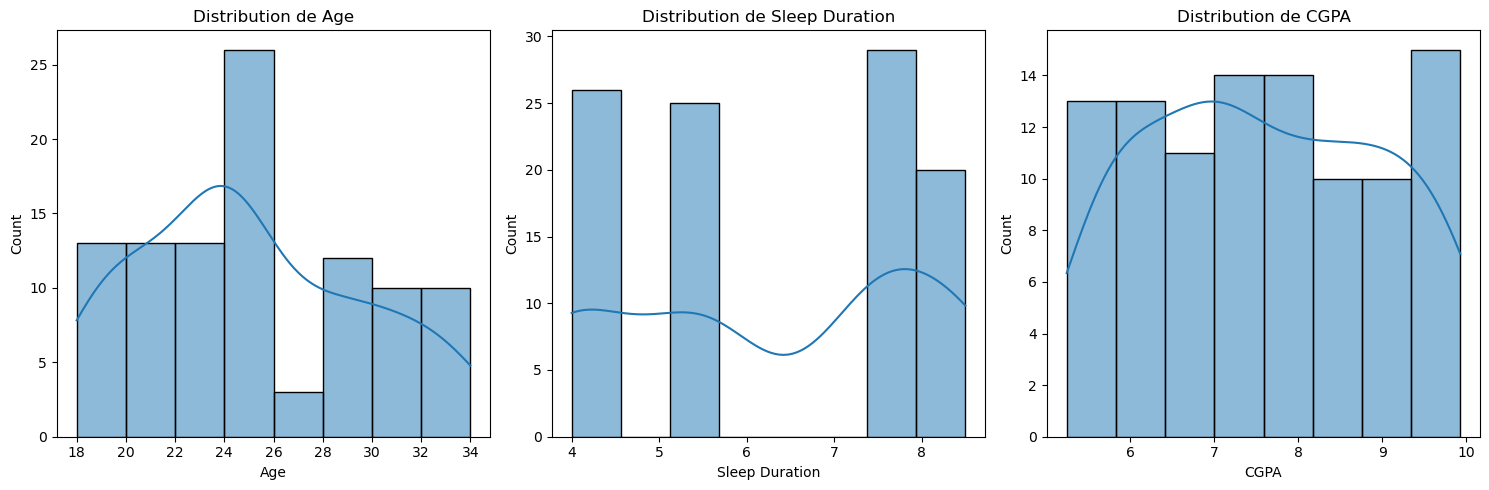

In [20]:
num_cols = ['Age', 'Sleep Duration', 'CGPA']
num_plots = len(num_cols)

fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=False)

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')

plt.tight_layout() 
plt.show()

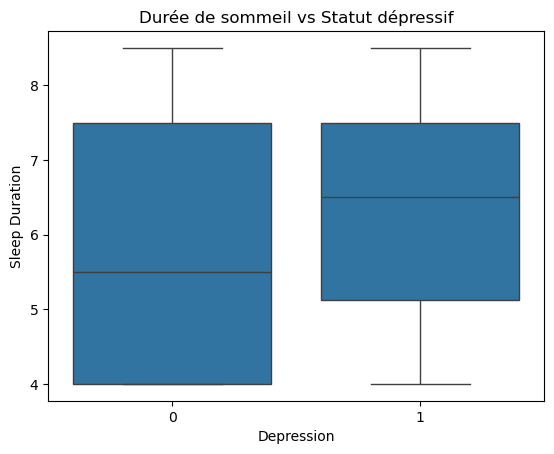

In [21]:
sns.boxplot(x='Depression', y='Sleep Duration', data=df)
plt.title('Durée de sommeil vs Statut dépressif')
plt.show()

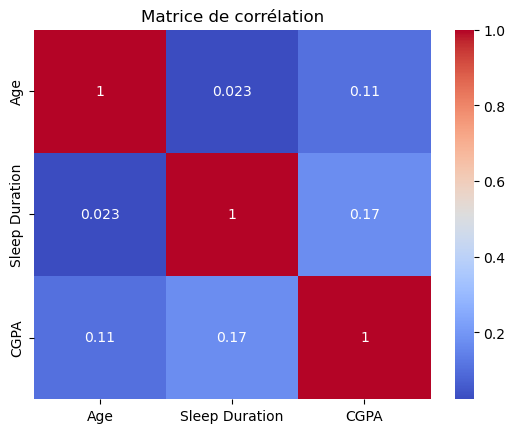

In [23]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [26]:
# Encodage des variables catégoriques
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Sélection des variables indépendantes et cible
X = df[['Age', 'Gender', 'CGPA', 'Sleep Duration', 'Academic Pressure', 'Study Satisfaction']]
y = df['Depression']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.79      0.61      0.69        18

    accuracy                           0.67        30
   macro avg       0.67      0.68      0.67        30
weighted avg       0.70      0.67      0.67        30



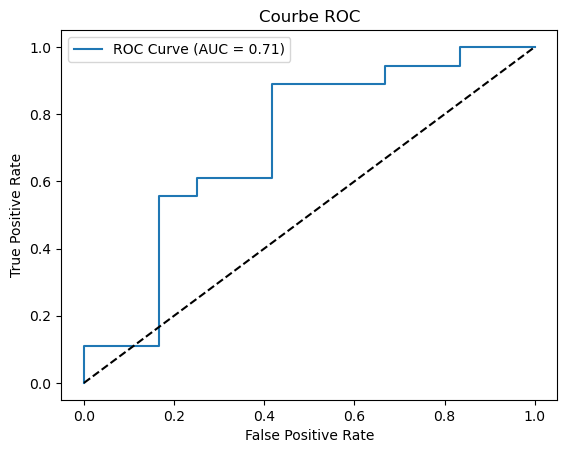

In [28]:
# Modèle de régression logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Prédictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Rapport de classification
print(classification_report(y_test, y_pred))

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.461747
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                   70
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 Dec 2024   Pseudo R-squ.:                  0.3334
Time:                        14:16:37   Log-Likelihood:                -32.322
converged:                       True   LL-Null:                       -48.492
Covariance Type:            nonrobust   LLR p-value:                 1.405e-05
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1776      2.849     -0.413      0.679      -6.762       4.407
Age  

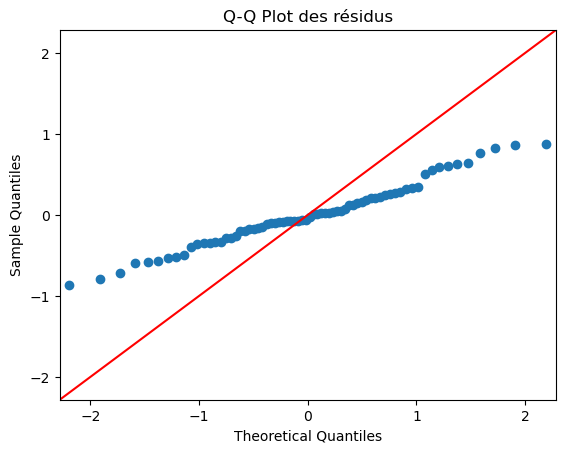

In [30]:
# Ajout de constantes pour le modèle Statsmodels
X_train_sm = sm.add_constant(X_train)
log_model_sm = sm.Logit(y_train, X_train_sm).fit()
print(log_model_sm.summary())

# Colinéarité : calcul des VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

# Normalité des résidus (approximative pour la logistique)
residuals = log_model_sm.resid_response
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot des résidus')
plt.show()